# Experiment Matlab image array to image

dataset from http://make3d.cs.cornell.edu/ 


# Import Library

In [265]:
import pathlib
import IPython.display as display
import scipy.io as sio 
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline 
import random
import os
import time, sys
from IPython.display import clear_output

## Setting

In [282]:
IN = "dataset/depthMat/"
groudTruth = "dataset/image/"
OUT= "dataset/depth/"
width,height = (1704,2272)

## Load ALL 

In [270]:
def update_progress(progress):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1
    block = int(round(10 * progress))
    clear_output(wait = True)
    text = "Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

    

root = pathlib.Path(IN)
all_image_paths = list(root.glob('*.mat'))
all_image_paths = [str(path) for path in all_image_paths]
print("Loaded " +str(len(all_image_paths))+" Images.\n "+str(all_image_paths[:3])+"\n...")


Loaded 400 Images.
 ['dataset\\depthMat\\depth_sph_corr-060705-17.10.14-p-018t000.mat', 'dataset\\depthMat\\depth_sph_corr-060705-17.10.14-p-111t000.mat', 'dataset\\depthMat\\depth_sph_corr-060705-17.10.14-p-142t000.mat']
...


In [693]:
def MatDepth2Gray(path):
    mat = sio.loadmat(path, appendmat=True)
    img = mat['Position3DGrid'][:,:,:]
    img = np.int32(img)
    img = cv2.normalize(img,None,alpha=0, beta=255, norm_type=cv2.NORM_MINMAX , dtype=cv2.CV_8UC1  )
    img = cv2.resize(img, (width,height),interpolation = cv2.INTER_AREA)
    return img


## Random Sample 4 Images

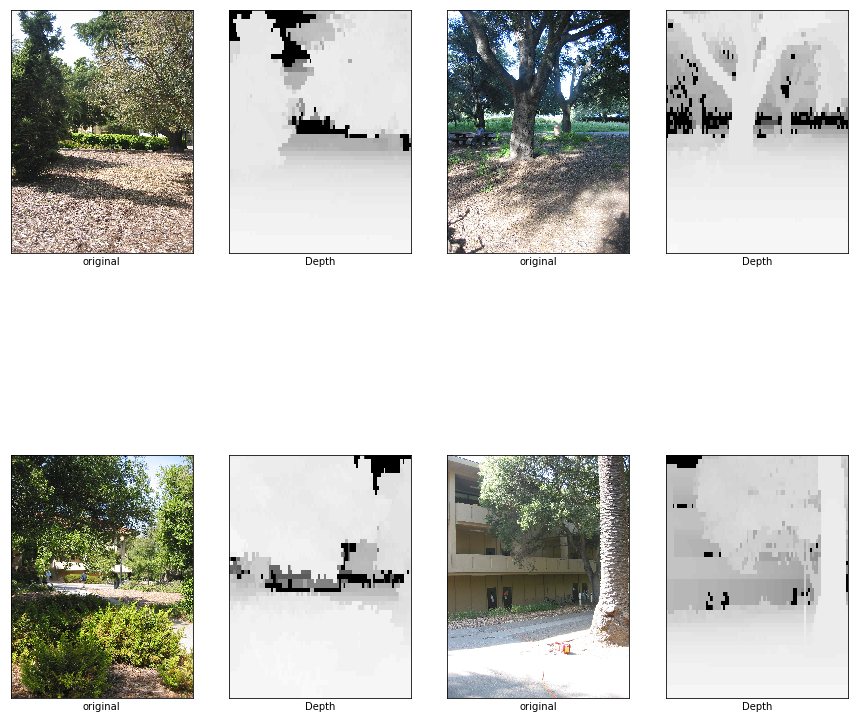

In [698]:
plt.figure(figsize=(15,15))
col = 1
for n in range(4):
    image_path = random.choice(all_image_paths)
    filename =  os.path.splitext(os.path.basename(image_path))[0].replace("depth_sph_corr","img")
    
    img = MatDepth2Gray(image_path)

    plt.subplot(2,4,col)
    
    gt = cv2.imread(groudTruth+filename+".jpg" )
    gt = cv2.cvtColor(gt, cv2.COLOR_BGR2RGB)

    plt.imshow(gt)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("original")
    
    col=col+1
    
    plt.subplot(2,4,col)
    plt.imshow(img,cmap="gray" )
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("Depth")
    img.shape
    
    col=col+1


## Batch Convert

In [274]:
for n,image in enumerate(all_image_paths):
    filename = os.path.splitext(os.path.basename(image))[0]
     
    im = MatDepth2Gray(image)
    update_progress(n / len(all_image_paths))
    plt.imsave(OUT+filename+".png", im,format="png")

Progress: [##########----------] 99.8%
